In [2]:
import pandas as pd
import numpy as np


In [3]:
cd C:/Users/Mask/Desktop/AIML Projects/Topic-Modelling-using-Contextual-Word-Embeddings

C:\Users\Mask\Desktop\AIML Projects\Topic-Modelling-using-Contextual-Word-Embeddings


In [13]:
with open("Citation Datset/outputacm.txt","r",encoding='UTF-8') as file:
    file_data = file.readline()

In [14]:
file_data

'629814\n629814\n'

In [16]:
file_

['629814\n',
 '#*Automated Deduction in Geometry: 5th International Workshop, ADG 2004, Gainesville, FL, USA, September 16-18, 2004, Revised Papers (Lecture Notes in Computer ... / Lecture Notes in Artificial Intelligence)\n',
 '#@Hoon Hong,Dongming Wang\n',
 '#t2006\n',
 '#c\n',
 '#index0\n',
 '\n',
 '#*A+ Certification Core Hardware (Text & Lab Manual)\n',
 '#@Charles J. Brooks\n',
 '#t2003\n',
 '#c\n',
 '#index1\n',
 '\n',
 '#*Performance engineering in industry: current practices and adoption challenges\n',
 '#@Ahmed E. Hassan,Parminder Flora\n',
 '#t2007\n',
 '#cProceedings of the 6th international workshop on Software and performance\n',
 '#index2\n',
 '#!This panel session discusses performance engineering practices in industry. Presentations in the session will explore the use of lightweight techniques and approaches in order to permit the cost effective and rapid adoption of performance modeling research by large industrial software systems.\n',
 '\n',
 '#*Dude, You Can Do It!

In [17]:
from octis.dataset.dataset import Dataset

In [25]:
data = Dataset()
data.fetch_dataset("DBLP")

In [30]:
data.get_corpus()

[['fast', 'cut', 'protocol', 'agent', 'coordination'],
 ['retrieval', 'base', 'class', 'svm'],
 ['semantic', 'annotation', 'personal', 'video', 'content', 'image'],
 ['semantic', 'repository', 'modeling', 'image', 'database'],
 ['global', 'local', 'scheme', 'imbalanced', 'point', 'matching'],
 ['index', 'structure', 'information', 'filter', 'vector', 'space', 'model'],
 ['evolutionary',
  'approach',
  'datum',
  'classification',
  'hybrid',
  'real',
  'code',
  'genetic',
  'algorithm',
  'pruning'],
 ['depth', 'edge', 'intensity', 'base', 'stereo'],
 ['universal', 'learn', 'evidence'],
 ['imagery', 'fusion', 'approach', 'particle', 'swarm', 'optimization'],
 ['bayesian',
  'network',
  'identify',
  'causal',
  'effect',
  'speed',
  'individual',
  'vehicle',
  'pedestrian'],
 ['large',
  'scale',
  'standard',
  'base',
  'observation',
  'imagery',
  'web',
  'mapping',
  'service'],
 ['probabilistic', 'inference', 'influence', 'diagram'],
 ['voting', 'rule', 'hard'],
 ['source'

In [60]:
from octis.models.CTM import CTM

In [63]:
ctm_model = CTM(num_topics=10,bert_path="C:/Users/Mask/Desktop/AIML Projects/Topic-Modelling-using-Contextual-Word-Embeddings",
              inference_type="combined",batch_size=32,reduce_on_plateau=True  )

In [64]:
ctm_output = ctm_model.train_model(data  )
ctm_output

{'topics': [['mining',
   'datum',
   'query',
   'efficient',
   'web',
   'search',
   'pattern',
   'stream',
   'frequent',
   'large'],
  ['video',
   'coding',
   'adaptive',
   'streaming',
   'rate',
   'error',
   'code',
   'scalable',
   'low',
   'motion'],
  ['network',
   'neural',
   'time',
   'real',
   'dynamic',
   'bayesian',
   'artificial',
   'system',
   'model',
   'social'],
  ['recognition',
   'detection',
   'face',
   'object',
   'automatic',
   'visual',
   'human',
   'feature',
   'tracking',
   'speech'],
  ['double',
   'inter',
   'tolerance',
   'balanced',
   'rapid',
   'assist',
   'wise',
   'redundant',
   'subtraction',
   'phase'],
  ['database',
   'system',
   'management',
   'distribute',
   'information',
   'orient',
   'design',
   'relational',
   'data',
   'application'],
  ['learn',
   'learning',
   'machine',
   'vector',
   'algorithm',
   'support',
   'reinforcement',
   'problem',
   'kernel',
   'optimization'],
  ['logic',

In [68]:
ctm_output.keys()

dict_keys(['topics', 'topic-document-matrix', 'topic-word-matrix', 'test-topic-document-matrix'])

In [88]:
for key in ctm_output.keys():
    if isinstance(ctm_output[key],np.ndarray):
        ctm_output[key] = ctm_output[key].tolist()

In [90]:
import json
with open("ctm_outputs.json",'w+',encoding="UTF-8") as fp:
    json.dump(ctm_output, fp)

In [131]:
topic = np.array(ctm_output['topic-word-matrix'][8])
topic

array([-0.43044481, -0.09391936, -0.00419044, ..., -1.30165577,
       -1.17844033, -1.01882589])

In [115]:
topic.argsort()[:-5-1:-1]

array([ 53,   1, 409, 417, 265], dtype=int64)

In [117]:
topic[53].round(3)

1.493

In [112]:
len(data.get_vocabulary())

1513

In [133]:
def get_topic_word_freq(topic_word_matrix, topic_num, vocab, number_top_words):
    word_freq = {}
    topic = np.array(topic_word_matrix[topic_num])
    for idx in topic.argsort()[:-number_top_words -1:-1]:
        word_freq[vocab[idx]] = topic[idx].round(3)
    return word_freq

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Topic Number :  0


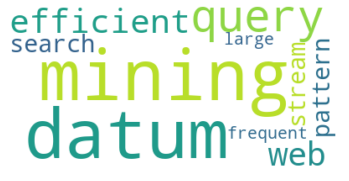

Topic Number :  1


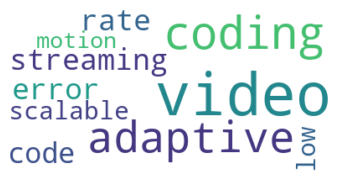

Topic Number :  2


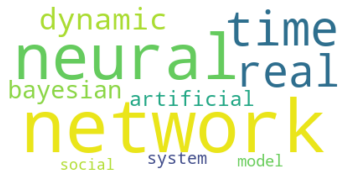

Topic Number :  3


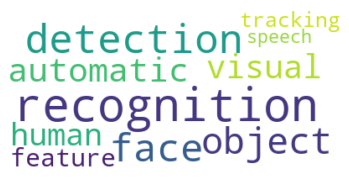

Topic Number :  4


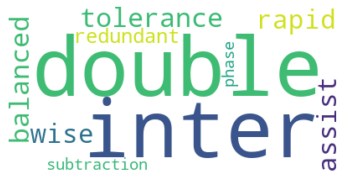

Topic Number :  5


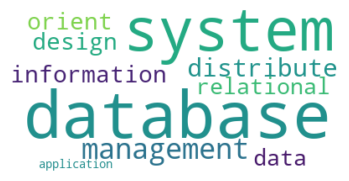

Topic Number :  6


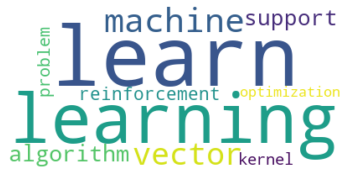

Topic Number :  7


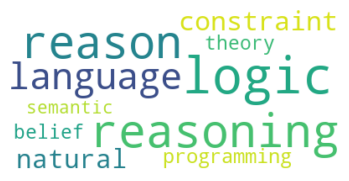

Topic Number :  8


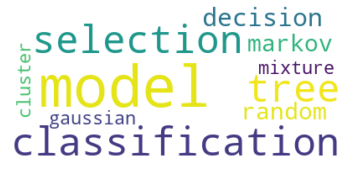

Topic Number :  9


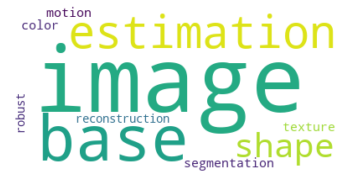

In [140]:
num_topics = 10
for i in range(0,num_topics):
    topic_word_freq = get_topic_word_freq(topic_word_matrix=ctm_output["topic-word-matrix"],
                                          topic_num = i, 
                                          vocab = data.get_vocabulary(),
                                          number_top_words = 10)
    print("Topic Number : ",i)
    word_cloud = WordCloud(background_color='white').generate_from_frequencies(topic_word_freq)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()